In [2]:
#########################################################
#       Script to open UVIS O3 occultation data file    #
#       and then plot the data contained within.        #
#########################################################
import matplotlib as mpl
import h5py
import numpy as np
from scipy.io import *
import matplotlib.pyplot as plt

# For the chosen colormap, requires the below package to be accessible
import cmcrameri.cm as cmc #used pip to download crcrameri, imported

# Levels of ozone to discretize by on the colorbar
levels_o3  = np.array([0, 0.5e6, 1e6, 0.5e7, 1e7, 0.25e8,  0.5e8,  0.75e8,  1e8, \
                                      0.25e9,  0.5e9,  0.75e9,  1e9, \
                                      0.25e10, 0.5e10, 0.75e10, 1e10])

# Open the data file
##################################
fileStr = "C:/Users/thoma/Downloads/occ_retrievals_o3_with_aero_my35_ls360.dat"
# Pull out the string array separately
uviso3_filename = np.genfromtxt(fileStr,skip_header=1,usecols=7,dtype=str)
uviso3_Data = np.genfromtxt(fileStr,skip_header=1,usecols=[0,1,2,3,4,5,6])
# Now define individual nomad data fields
##################################
uviso3_ls = uviso3_Data[:,0]
uviso3_lat = uviso3_Data[:,1]
uviso3_lon = uviso3_Data[:,2]
uviso3_lt = uviso3_Data[:,3]
uviso3_alt = uviso3_Data[:,4]
uviso3_o3 = uviso3_Data[:,5]
uviso3_o3err = uviso3_Data[:,6]

print(len(uviso3_ls))
print(len(uviso3_alt))



# Make MY35 data continue in Ls rather than overlap to plot correctly
for m in np.arange(len(uviso3_ls)-1):
      if (np.abs(uviso3_ls[m+1]-uviso3_ls[m]) > 100.):
            uviso3_ls[m+1:len(uviso3_ls)] = uviso3_ls[m+1:len(uviso3_ls)]+360.
            
#finding the indices for Ls at the equinoxes, solstices, perihelion and aphelion between the start and end of the data. 20 Ls wide
#y and x indices are the same
x_indices_MY34_autumnalequinox_160to200 = np.where((uviso3_ls >= 160) & (uviso3_ls <= 200))
print(x_indices_MY34_autumnalequinox_160to200)
xmin_shape = np.nanmin(x_indices_MY34_autumnalequinox_160to200)
print(xmin_shape)
xmax_shape = np.nanmax(x_indices_MY34_autumnalequinox_160to200)
print(xmax_shape)
uviso3_ls_MY34_autumnalequinox = uviso3_ls[0:8657+1]
uviso3_alt_MY34_autumalequinox = uviso3_alt[0:8657+1]
uviso3_o3_MY34_autumalequinox = uviso3_o3[0:8657+1]
uviso3_o3err_MY34_autumalequinox = uviso3_o3err[0:8657+1]
uviso3_lat_MY34_autumalequinox = uviso3_lat[0:8657+1]
uviso3_lon_MY34_autumalequinox = uviso3_lon[0:8657+1]

#x_indices_MY34_perihelion_241to261 = np.where((uviso3_ls >= 241) & (uviso3_ls <= 261))
#print(x_indices_MY34_perihelion_241to261)

#x_indices_MY34_wintersolstice_260to280 = np.where((uviso3_ls >= 260) & (uviso3_ls <= 280))
#print(x_indices_MY34_wintersolstice_260to280)

#x_indices_MY35_vernalequinox_350to370 = np.where((uviso3_ls >= 350) & (uviso3_ls <= 370))
#print(x_indices_MY35_vernalequinox_350to370)

#x_indices_MY35_aphelion_60to80 = np.where((uviso3_ls >= 420) & (uviso3_ls <= 440))
#print(x_indices_MY35_aphelion_60to80)

#x_indices_MY35_summersolstice_80to100 = np.where((uviso3_ls >= 440) & (uviso3_ls <= 460))
#print(x_indices_MY35_summersolstice_80to100)

#x_indices_MY35_autumnalequinox_170to190 = np.where((uviso3_ls >= 530) & (uviso3_ls <= 550))
#print(x_indices_MY35_autumnalequinox_170to190)

#x_indices_MY35_perihelion_241to261 = np.where((uviso3_ls >= 601) & (uviso3_ls <= 621))
#print(x_indices_MY35_perihelion_241to261)

#x_indices_MY35_wintersolstice_260to280 = np.where((uviso3_ls >= 620) & (uviso3_ls <= 640))
#print(x_indices_MY35_wintersolstice_260to280)



## define the bins and normalize
norm_o3 = mpl.colors.BoundaryNorm(levels_o3, ncolors=cmc.batlow.N) #changed SM6 to cmc



553630
553630
(array([   0,    1,    2, ..., 8655, 8656, 8657], dtype=int64),)
0
8657


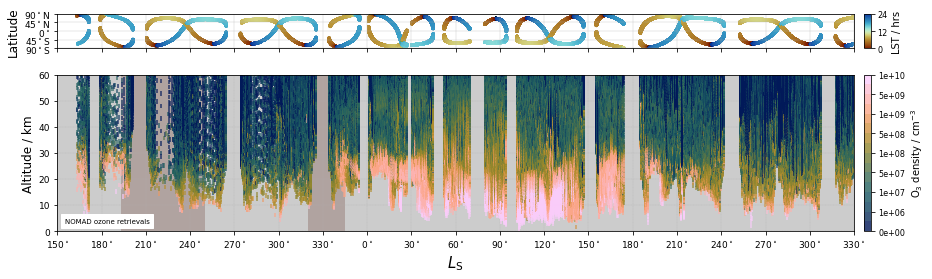

In [5]:
## Plot the figure
fig = plt.figure()
plt.subplot(4,1,1)
CS2 = plt.scatter(uviso3_ls,uviso3_lat,c=uviso3_lt,s=5,cmap=cmc.roma,vmin=0,vmax=24) #changed cmap from scm6 to cmc
cbar2 = plt.colorbar(CS2,ticks=[0,12,24],aspect=5,pad=0.01)
cbar2.set_label('LST / hrs',fontsize=10)
for t in cbar2.ax.get_yticklabels():
    t.set_fontsize(8)
plt.ylabel('Latitude',fontsize=12)
plt.yticks(np.arange(-90.,135.,45.),('90$^\circ$S','45$^\circ$S','0$^\circ$','45$^\circ$N','90$^\circ$N'),fontsize=9)
plt.xticks(np.arange(150.,720.,30.),('','','','','','','','','','','','','','','','','','',''),fontsize=9) # ticklabels(18) did not match number of fixedLocator locations, added set of apostrophy
plt.grid(lw=0.3)
plt.axis([150.,690.,-90.,90.])

plt.subplot(4,1,(2,4))
plt.axvspan(193.,250., color='tab:brown', alpha=0.3, lw=0,zorder=1)
plt.axvspan(320., 345., color='tab:brown', alpha=0.3, lw=0,zorder=1)
plt.axvspan(150.,690., color='k', alpha=0.2, lw=0,zorder=1)

#whole uvis plot
CS1 = plt.scatter(uviso3_ls,uviso3_alt,c=uviso3_o3,s=20,marker='|',cmap=cmc.batlow,norm=norm_o3,alpha=0.8,zorder=2)#cahnge scm6 to cmc
cbar = plt.colorbar(CS1,orientation='vertical', format='%.0e',pad=0.01)
cbar.set_label(r'O$_3$ density / cm$^{-3}$',fontsize=10)
plt.xlabel('$L_\mathrm{S}$',fontsize=15)
plt.ylabel('Altitude / km',fontsize=12)
plt.text(155.,3.,'NOMAD ozone retrievals',fontsize = 7,backgroundcolor='w')
plt.grid(ls='--',lw=0.3)

for t in cbar.ax.get_yticklabels():
    t.set_fontsize(8)
plt.yticks(np.arange(0,70,10),fontsize=9)
plt.xticks(np.arange(150.,720.,30.),('150$^\circ$','180$^\circ$','210$^\circ$','240$^\circ$','270$^\circ$','300$^\circ$','330$^\circ$','0$^\circ$','30$^\circ$','60$^\circ$','90$^\circ$','120$^\circ$','150$^\circ$','180$^\circ$','210$^\circ$','240$^\circ$','270$^\circ$','300$^\circ$','330$^\circ$'),fontsize=9)
plt.axis([150.,690.,0.,60.])

plt.subplots_adjust(hspace=0.75)

fig.set_size_inches(17,4)
fig.savefig('uvis_o3_alt_ls.png',dpi=400,bbox_inches='tight',pad_inches = 0.2)
#plt.close()





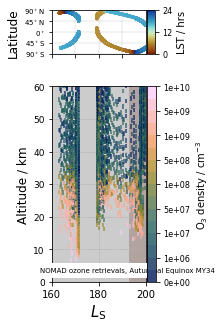

In [16]:
#autumnal equinox
#latitude

#finding the indices for Ls at the equinoxes, solstices, perihelion and aphelion between the start and end of the data. 20 Ls wide
#y and x indices are the same
ls_min=160.
ls_max=200.
x_indices_MY34_AE_160to200 = np.where((uviso3_ls >= ls_min) & (uviso3_ls <= ls_max))
xmin_shape = np.nanmin(x_indices_MY34_AE_160to200)
xmax_shape = np.nanmax(x_indices_MY34_AE_160to200)

uviso3_ls_MY34_AE = uviso3_ls[xmin_shape:xmax_shape+1]
uviso3_lat_MY34_AE = uviso3_lat[xmin_shape:xmax_shape+1]
uviso3_alt_MY34_AE = uviso3_alt[xmin_shape:xmax_shape+1]
uviso3_o3_MY34_AE = uviso3_o3[xmin_shape:xmax_shape+1]
uviso3_o3err_MY34_AE = uviso3_o3err[xmin_shape:xmax_shape+1]
uviso3_lon_MY34_AE = uviso3_lon[xmin_shape:xmax_shape+1]

uvis_solarlong = uviso3_ls_MY34_AE
uvis_latitude = uviso3_lat_MY34_AE
uvis_altitude = uviso3_alt_MY34_AE



fig = plt.figure()
plt.subplot(4,1,1)
CS3 = plt.scatter(uvis_solarlong,uvis_latitude,c=uviso3_lt[:len(uvis_solarlong)],s=5,cmap=cmc.roma,vmin=0,vmax=24) #changed cmap from scm6 to cmc
cbar3 = plt.colorbar(CS3,ticks=[0,12,24],aspect=5,pad=0.01)
cbar3.set_label('LST / hrs',fontsize=10)
for t in cbar3.ax.get_yticklabels():
    t.set_fontsize(8)
plt.ylabel('Latitude',fontsize=12)
plt.yticks(np.arange(-90.,135.,45.),('90$^\circ$S','45$^\circ$S','0$^\circ$','45$^\circ$N','90$^\circ$N'),fontsize=7)
plt.xticks(np.arange(ls_min,ls_max,10.),('','','',''),fontsize=9)
#xlabelling_autumnal_eq = list(map(lambda x:'',np.arange(ls_min,ls_max,10.)))
#plt.xticks((ls_min,ls_max,10.),xlabelling_autumnal_eq)
plt.grid(lw=0.3)
plt.axis([ls_min,ls_max,-90.,90.])

plt.subplot(4,1,(2,4))
plt.axvspan(193.,250., color='tab:brown', alpha=0.3, lw=0,zorder=1)
plt.axvspan(320., 345., color='tab:brown', alpha=0.3, lw=0,zorder=1)
plt.axvspan(150.,690., color='k', alpha=0.2, lw=0,zorder=1)

#autumnal equinox altitude
CS4 = plt.scatter(uvis_solarlong,uvis_altitude,c=uviso3_o3[:len(uvis_solarlong)],s=20,marker='|',cmap=cmc.batlow,norm=norm_o3,alpha=0.8,zorder=2)#cahnge scm6 to cmc
cbar4 = plt.colorbar(CS4,orientation='vertical', format='%.0e',pad=0.01)
cbar4.set_label(r'O$_3$ density / cm$^{-3}$',fontsize=10)
plt.xlabel('$L_\mathrm{S}$',fontsize=15)
plt.ylabel('Altitude / km',fontsize=12)
plt.text(155.,3.,'NOMAD ozone retrievals, Autumnal Equinox MY34',fontsize = 7,backgroundcolor='w')
plt.grid(ls='--',lw=0.6)

for t in cbar4.ax.get_yticklabels():
    t.set_fontsize(8)
plt.yticks(np.arange(0,70,10),fontsize=9)
#plt.xticks(np.arange(160.,200.,1.),('160$^\circ$','161$^\circ$','162$^\circ$','163$^\circ$','164$^\circ$','165$^\circ$','166$^\circ$','167$^\circ$','168$^\circ$','169$^\circ$','170$^\circ$','171$^\circ$','172$^\circ$','173$^\circ$''174$^\circ$','175$^\circ$','176$^\circ$','177$^\circ$','178$^\circ$','179$^\circ$','180$^\circ$','181$^\circ$','182$^\circ$','183$^\circ$','184$^\circ$','185$^\circ$','186$^\circ$','187$^\circ$','188$^\circ$','189$^\circ$','190$^\circ$','191$^\circ$','192$^\circ$','193$^\circ$','194$^\circ$','195$^\circ$','196$^\circ$','197$^\circ$','198$^\circ$','199$^\circ$','200$^\circ$',),fontsize=5)

xlabelling_autumnal_eq = list(map(lambda x: f'{x}$^\circ$',np.arange(ls_min,ls_max,2.)))

plt.axis([ls_min,ls_max,0.,60.])
plt.subplots_adjust(hspace=0.75)

fig.set_size_inches(2,5)
fig.savefig('uvis_o3_alt_ls_AEMY34.png',dpi=400,bbox_inches='tight',pad_inches = 0.2)
#plt.close()



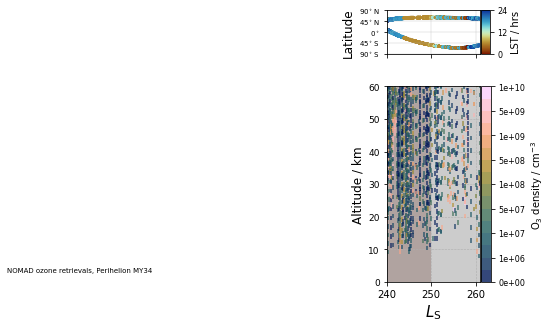

In [17]:
#MY34 Perihelion
#latitude

#finding the indices for Ls at the equinoxes, solstices, perihelion and aphelion between the start and end of the data. 20 Ls wide
#y and x indices are the same

ls_min=240.
ls_max=261.
x_indices_MY34_PH_241to261 = np.where((uviso3_ls >= ls_min) & (uviso3_ls <= ls_max))
xmin_shape = np.nanmin(x_indices_MY34_PH_241to261)
xmax_shape = np.nanmax(x_indices_MY34_PH_241to261)

uviso3_ls_MY34_PH = uviso3_ls[xmin_shape:xmax_shape+1]
uviso3_lat_MY34_PH = uviso3_lat[xmin_shape:xmax_shape+1]
uviso3_alt_MY34_PH = uviso3_alt[xmin_shape:xmax_shape+1]
uviso3_o3_MY34_PH = uviso3_o3[xmin_shape:xmax_shape+1]
uviso3_o3err_MY34_PH = uviso3_o3err[xmin_shape:xmax_shape+1]
uviso3_lon_MY34_PH = uviso3_lon[xmin_shape:xmax_shape+1]

uvis_solarlong = uviso3_ls_MY34_PH
uvis_latitude = uviso3_lat_MY34_PH
uvis_altitude = uviso3_alt_MY34_PH

fig = plt.figure()
plt.subplot(4,1,1)
CS3 = plt.scatter(uvis_solarlong,uvis_latitude,c=uviso3_lt[:len(uvis_solarlong)],s=5,cmap=cmc.roma,vmin=0,vmax=24) #changed cmap from scm6 to cmc
cbar3 = plt.colorbar(CS3,ticks=[0,12,24],aspect=5,pad=0.01)
cbar3.set_label('LST / hrs',fontsize=10)
for t in cbar3.ax.get_yticklabels():
    t.set_fontsize(8)
plt.ylabel('Latitude',fontsize=12)
plt.yticks(np.arange(-90.,135.,45.),('90$^\circ$S','45$^\circ$S','0$^\circ$','45$^\circ$N','90$^\circ$N'),fontsize=7)
plt.xticks(np.arange(ls_min,ls_max,10.),('','',''),fontsize=9)
xlabelling_MY34_PH = list(map(lambda x: '',np.arange(ls_min,ls_max,1.)))
plt.grid(lw=0.3)
plt.axis([ls_min,ls_max,-90.,90.])

plt.subplot(4,1,(2,4))
plt.axvspan(193.,250., color='tab:brown', alpha=0.3, lw=0,zorder=1)
plt.axvspan(320., 345., color='tab:brown', alpha=0.3, lw=0,zorder=1)
plt.axvspan(150.,690., color='k', alpha=0.2, lw=0,zorder=1)

#altitude
CS4 = plt.scatter(uvis_solarlong,uvis_altitude,c=uviso3_o3[:len(uvis_solarlong)],s=20,marker='|',cmap=cmc.batlow,norm=norm_o3,alpha=0.8,zorder=2)#cahnge scm6 to cmc
cbar4 = plt.colorbar(CS4,orientation='vertical', format='%.0e',pad=0.01)
cbar4.set_label(r'O$_3$ density / cm$^{-3}$',fontsize=10)
plt.xlabel('$L_\mathrm{S}$',fontsize=15)
plt.ylabel('Altitude / km',fontsize=12)
plt.text(155.,3.,'NOMAD ozone retrievals, Perihelion MY34',fontsize = 7,backgroundcolor='w')
plt.grid(ls='--',lw=0.6)

for t in cbar4.ax.get_yticklabels():
    t.set_fontsize(8)
plt.yticks(np.arange(0,70,10),fontsize=9)
#plt.xticks(np.arange(160.,200.,1.),('160$^\circ$','161$^\circ$','162$^\circ$','163$^\circ$','164$^\circ$','165$^\circ$','166$^\circ$','167$^\circ$','168$^\circ$','169$^\circ$','170$^\circ$','171$^\circ$','172$^\circ$','173$^\circ$''174$^\circ$','175$^\circ$','176$^\circ$','177$^\circ$','178$^\circ$','179$^\circ$','180$^\circ$','181$^\circ$','182$^\circ$','183$^\circ$','184$^\circ$','185$^\circ$','186$^\circ$','187$^\circ$','188$^\circ$','189$^\circ$','190$^\circ$','191$^\circ$','192$^\circ$','193$^\circ$','194$^\circ$','195$^\circ$','196$^\circ$','197$^\circ$','198$^\circ$','199$^\circ$','200$^\circ$',),fontsize=5)

xlabelling_MY34_PH = list(map(lambda x: f'{x}$^\circ$',np.arange(ls_min,ls_max,2.)))

plt.axis([ls_min,ls_max,0.,60.])
plt.subplots_adjust(hspace=0.75)

fig.set_size_inches(2,5)
fig.savefig('uvis_o3_alt_ls_PHMY34.png',dpi=400,bbox_inches='tight',pad_inches = 0.2)
#plt.close()


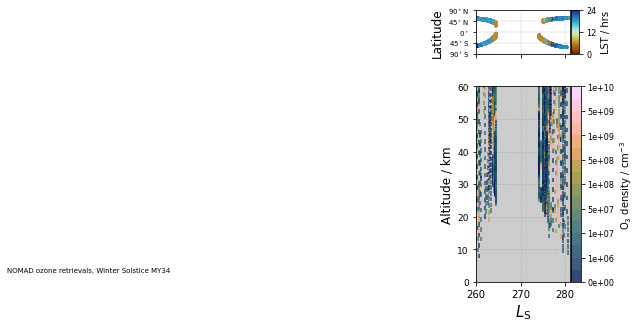

In [18]:
#MY34 Winter Solstice
#latitude

#x_indices_MY34_wintersolstice_260to280 = np.where((uviso3_ls >= 260) & (uviso3_ls <= 280))
#print(x_indices_MY34_wintersolstice_260to280)

#finding the indices for Ls at the equinoxes, solstices, perihelion and aphelion between the start and end of the data. 20 Ls wide
#y and x indices are the same

ls_min=260.
ls_max=281.

x_indices_MY34_WS_260to280 = np.where((uviso3_ls >= ls_min) & (uviso3_ls <= ls_max))
xmin_shape = np.nanmin(x_indices_MY34_WS_260to280)
xmax_shape = np.nanmax(x_indices_MY34_WS_260to280)

uviso3_ls_MY34_WS = uviso3_ls[xmin_shape:xmax_shape+1]
uviso3_lat_MY34_WS = uviso3_lat[xmin_shape:xmax_shape+1]
uviso3_alt_MY34_WS = uviso3_alt[xmin_shape:xmax_shape+1]
uviso3_o3_MY34_WS = uviso3_o3[xmin_shape:xmax_shape+1]
uviso3_o3err_MY34_WS = uviso3_o3err[xmin_shape:xmax_shape+1]
uviso3_lon_MY34_WS = uviso3_lon[xmin_shape:xmax_shape+1]

uvis_solarlong = uviso3_ls_MY34_WS
uvis_latitude = uviso3_lat_MY34_WS
uvis_altitude = uviso3_alt_MY34_WS

fig = plt.figure()
plt.subplot(4,1,1)
CS3 = plt.scatter(uvis_solarlong,uvis_latitude,c=uviso3_lt[:len(uvis_solarlong)],s=5,cmap=cmc.roma,vmin=0,vmax=24) #changed cmap from scm6 to cmc
cbar3 = plt.colorbar(CS3,ticks=[0,12,24],aspect=5,pad=0.01)
cbar3.set_label('LST / hrs',fontsize=10)
for t in cbar3.ax.get_yticklabels():
    t.set_fontsize(8)
plt.ylabel('Latitude',fontsize=12)
plt.yticks(np.arange(-90.,135.,45.),('90$^\circ$S','45$^\circ$S','0$^\circ$','45$^\circ$N','90$^\circ$N'),fontsize=7)
plt.xticks(np.arange(ls_min,ls_max,10.),('','',''),fontsize=9)
xlabelling_MY34_WS = list(map(lambda x: '',np.arange(ls_min,ls_max,1.)))
plt.grid(lw=0.3)
plt.axis([ls_min,ls_max,-90.,90.])

plt.subplot(4,1,(2,4))
plt.axvspan(193.,250., color='tab:brown', alpha=0.3, lw=0,zorder=1)
plt.axvspan(320., 345., color='tab:brown', alpha=0.3, lw=0,zorder=1)
plt.axvspan(150.,690., color='k', alpha=0.2, lw=0,zorder=1)

#altitude
CS4 = plt.scatter(uvis_solarlong,uvis_altitude,c=uviso3_o3[:len(uvis_solarlong)],s=20,marker='|',cmap=cmc.batlow,norm=norm_o3,alpha=0.8,zorder=2)#cahnge scm6 to cmc
cbar4 = plt.colorbar(CS4,orientation='vertical', format='%.0e',pad=0.01)
cbar4.set_label(r'O$_3$ density / cm$^{-3}$',fontsize=10)
plt.xlabel('$L_\mathrm{S}$',fontsize=15)
plt.ylabel('Altitude / km',fontsize=12)
plt.text(155.,3.,'NOMAD ozone retrievals, Winter Solstice MY34',fontsize = 7,backgroundcolor='w')
plt.grid(ls='--',lw=0.6)

for t in cbar4.ax.get_yticklabels():
    t.set_fontsize(8)
plt.yticks(np.arange(0,70,10),fontsize=9)
#plt.xticks(np.arange(160.,200.,1.),('160$^\circ$','161$^\circ$','162$^\circ$','163$^\circ$','164$^\circ$','165$^\circ$','166$^\circ$','167$^\circ$','168$^\circ$','169$^\circ$','170$^\circ$','171$^\circ$','172$^\circ$','173$^\circ$''174$^\circ$','175$^\circ$','176$^\circ$','177$^\circ$','178$^\circ$','179$^\circ$','180$^\circ$','181$^\circ$','182$^\circ$','183$^\circ$','184$^\circ$','185$^\circ$','186$^\circ$','187$^\circ$','188$^\circ$','189$^\circ$','190$^\circ$','191$^\circ$','192$^\circ$','193$^\circ$','194$^\circ$','195$^\circ$','196$^\circ$','197$^\circ$','198$^\circ$','199$^\circ$','200$^\circ$',),fontsize=5)

xlabelling_MY34_WS = list(map(lambda x: f'{x}$^\circ$',np.arange(ls_min,ls_max,2.)))

plt.axis([ls_min,ls_max,0.,60.])
plt.subplots_adjust(hspace=0.75)

fig.set_size_inches(2,5)
fig.savefig('uvis_o3_alt_ls_WSMY34.png',dpi=400,bbox_inches='tight',pad_inches = 0.2)
#plt.close()

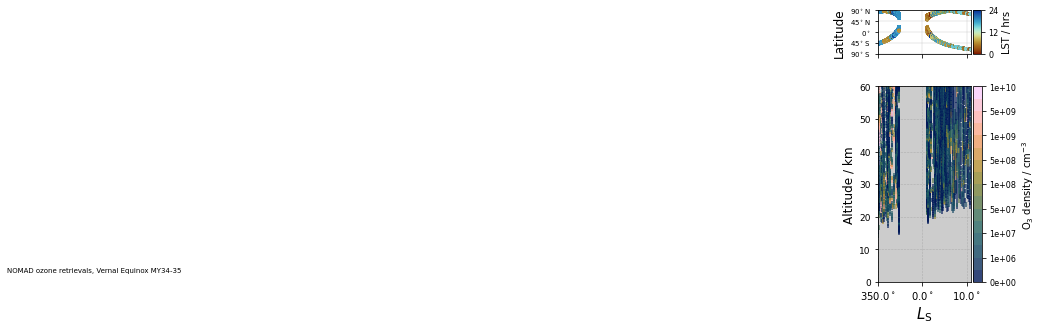

In [19]:
#MY34-35 Vernal Equinox
#latitude

#x_indices_MY35_vernalequinox_350to370 = np.where((uviso3_ls >= 350) & (uviso3_ls <= 370))
#print(x_indices_MY35_vernalequinox_350to370)

#finding the indices for Ls at the equinoxes, solstices, perihelion and aphelion between the start and end of the data. 20 Ls wide
#y and x indices are the same

ls_min=350.
ls_max=371.
x_indices_MY34_VE_350to370 = np.where((uviso3_ls >= ls_min) & (uviso3_ls <= ls_max))
xmin_shape = np.nanmin(x_indices_MY34_VE_350to370)
xmax_shape = np.nanmax(x_indices_MY34_VE_350to370)

uviso3_ls_MY34_VE = uviso3_ls[xmin_shape:xmax_shape+1]
uviso3_lat_MY34_VE = uviso3_lat[xmin_shape:xmax_shape+1]
uviso3_alt_MY34_VE = uviso3_alt[xmin_shape:xmax_shape+1]
uviso3_o3_MY34_VE = uviso3_o3[xmin_shape:xmax_shape+1]
uviso3_o3err_MY34_VE = uviso3_o3err[xmin_shape:xmax_shape+1]
uviso3_lon_MY34_VE = uviso3_lon[xmin_shape:xmax_shape+1]

uvis_solarlong = uviso3_ls_MY34_VE
uvis_latitude = uviso3_lat_MY34_VE
uvis_altitude = uviso3_alt_MY34_VE

fig = plt.figure()
plt.subplot(4,1,1)
CS3 = plt.scatter(uvis_solarlong,uvis_latitude,c=uviso3_lt[:len(uvis_solarlong)],s=5,cmap=cmc.roma,vmin=0,vmax=24) #changed cmap from scm6 to cmc
cbar3 = plt.colorbar(CS3,ticks=[0,12,24],aspect=5,pad=0.01)
cbar3.set_label('LST / hrs',fontsize=10)
for t in cbar3.ax.get_yticklabels():
    t.set_fontsize(8)
plt.ylabel('Latitude',fontsize=12)
plt.yticks(np.arange(-90.,135.,45.),('90$^\circ$S','45$^\circ$S','0$^\circ$','45$^\circ$N','90$^\circ$N'),fontsize=7)
plt.xticks(np.arange(ls_min,ls_max,10.),('','',''),fontsize=9)
xlabelling_MY34_WS = list(map(lambda x: '',np.arange(ls_min,ls_max,1.)))
plt.grid(lw=0.3)
plt.axis([ls_min,ls_max,-90.,90.])

plt.subplot(4,1,(2,4))
plt.axvspan(193.,250., color='tab:brown', alpha=0.3, lw=0,zorder=1)
plt.axvspan(320., 345., color='tab:brown', alpha=0.3, lw=0,zorder=1)
plt.axvspan(150.,690., color='k', alpha=0.2, lw=0,zorder=1)

#altitude
CS4 = plt.scatter(uvis_solarlong,uvis_altitude,c=uviso3_o3[:len(uvis_solarlong)],s=20,marker='|',cmap=cmc.batlow,norm=norm_o3,alpha=0.8,zorder=2)#cahnge scm6 to cmc
cbar4 = plt.colorbar(CS4,orientation='vertical', format='%.0e',pad=0.01)
cbar4.set_label(r'O$_3$ density / cm$^{-3}$',fontsize=10)
plt.xlabel('$L_\mathrm{S}$',fontsize=15)
plt.ylabel('Altitude / km',fontsize=12)
plt.text(155.,3.,'NOMAD ozone retrievals, Vernal Equinox MY34-35',fontsize = 7,backgroundcolor='w')
plt.grid(ls='--',lw=0.6)

for t in cbar4.ax.get_yticklabels():
    t.set_fontsize(8)
plt.yticks(np.arange(0,70,10),fontsize=9)
#plt.xticks(np.arange(160.,200.,1.),('160$^\circ$','161$^\circ$','162$^\circ$','163$^\circ$','164$^\circ$','165$^\circ$','166$^\circ$','167$^\circ$','168$^\circ$','169$^\circ$','170$^\circ$','171$^\circ$','172$^\circ$','173$^\circ$''174$^\circ$','175$^\circ$','176$^\circ$','177$^\circ$','178$^\circ$','179$^\circ$','180$^\circ$','181$^\circ$','182$^\circ$','183$^\circ$','184$^\circ$','185$^\circ$','186$^\circ$','187$^\circ$','188$^\circ$','189$^\circ$','190$^\circ$','191$^\circ$','192$^\circ$','193$^\circ$','194$^\circ$','195$^\circ$','196$^\circ$','197$^\circ$','198$^\circ$','199$^\circ$','200$^\circ$',),fontsize=5)

xlabelling_MY34_WS = list(map(lambda x: f'{x}$^\circ$',list(map(lambda x: x%360,np.arange(ls_min,ls_max,10.))))) #for crossover

plt.xticks(np.arange(ls_min,ls_max,10),xlabelling_MY34_WS)

plt.axis([ls_min,ls_max,0.,60.])
plt.subplots_adjust(hspace=0.75)

fig.set_size_inches(2,5)
fig.savefig('uvis_o3_alt_ls_VEMY3435.png',dpi=400,bbox_inches='tight',pad_inches = 0.2)
#plt.close()

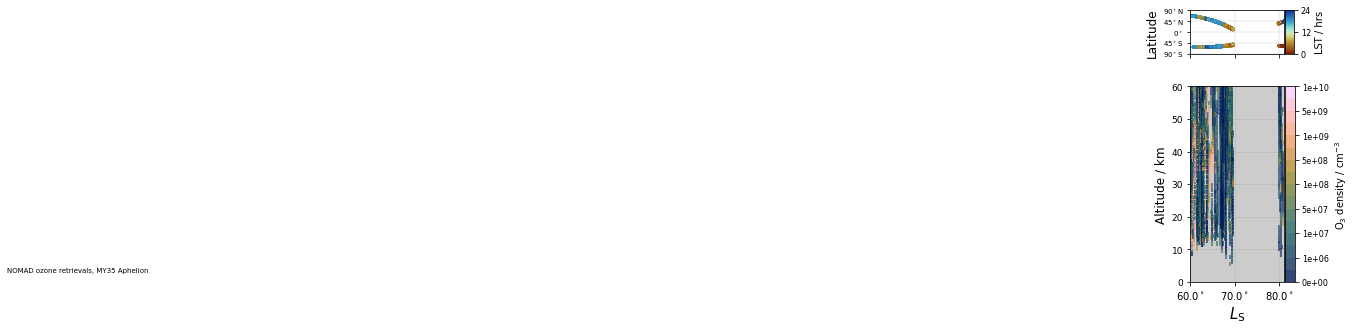

In [23]:
#MY35 Aphelion
#latitude

#finding the indices for Ls at the equinoxes, solstices, perihelion and aphelion between the start and end of the data. 20 Ls wide
#y and x indices are the same

ls_min=420.
ls_max=441.
x_indices_MY35_AH_60to80 = np.where((uviso3_ls >= ls_min) & (uviso3_ls <= ls_max))
xmin_shape = np.nanmin(x_indices_MY35_AH_60to80)
xmax_shape = np.nanmax(x_indices_MY35_AH_60to80)

uviso3_ls_MY35_AH = uviso3_ls[xmin_shape:xmax_shape+1]
uviso3_lat_MY35_AH = uviso3_lat[xmin_shape:xmax_shape+1]
uviso3_alt_MY35_AH = uviso3_alt[xmin_shape:xmax_shape+1]
uviso3_o3_MY35_AH = uviso3_o3[xmin_shape:xmax_shape+1]
uviso3_o3err_MY35_AH = uviso3_o3err[xmin_shape:xmax_shape+1]
uviso3_lon_MY35_AH = uviso3_lon[xmin_shape:xmax_shape+1]

uvis_solarlong = uviso3_ls_MY35_AH
uvis_latitude = uviso3_lat_MY35_AH
uvis_altitude = uviso3_alt_MY35_AH

fig = plt.figure()
plt.subplot(4,1,1)
CS3 = plt.scatter(uvis_solarlong,uvis_latitude,c=uviso3_lt[:len(uvis_solarlong)],s=5,cmap=cmc.roma,vmin=0,vmax=24) #changed cmap from scm6 to cmc
cbar3 = plt.colorbar(CS3,ticks=[0,12,24],aspect=5,pad=0.01)
cbar3.set_label('LST / hrs',fontsize=10)
for t in cbar3.ax.get_yticklabels():
    t.set_fontsize(8)
plt.ylabel('Latitude',fontsize=12)
plt.yticks(np.arange(-90.,135.,45.),('90$^\circ$S','45$^\circ$S','0$^\circ$','45$^\circ$N','90$^\circ$N'),fontsize=7)
plt.xticks(np.arange(ls_min,ls_max,10.),('','',''),fontsize=9)
#xlabelling_MY34_AH = list(map(lambda x: '',np.arange(ls_min,ls_max,1.)))
plt.grid(lw=0.3)
plt.axis([ls_min,ls_max,-90.,90.])

plt.subplot(4,1,(2,4))
plt.axvspan(193.,250., color='tab:brown', alpha=0.3, lw=0,zorder=1)
plt.axvspan(320., 345., color='tab:brown', alpha=0.3, lw=0,zorder=1)
plt.axvspan(150.,690., color='k', alpha=0.2, lw=0,zorder=1)

#autumnal equinox altitude
CS4 = plt.scatter(uvis_solarlong,uvis_altitude,c=uviso3_o3[:len(uvis_solarlong)],s=20,marker='|',cmap=cmc.batlow,norm=norm_o3,alpha=0.8,zorder=2)#cahnge scm6 to cmc
cbar4 = plt.colorbar(CS4,orientation='vertical', format='%.0e',pad=0.01)
cbar4.set_label(r'O$_3$ density / cm$^{-3}$',fontsize=10)
plt.xlabel('$L_\mathrm{S}$',fontsize=15)
plt.ylabel('Altitude / km',fontsize=12)
plt.text(155.,3.,'NOMAD ozone retrievals, MY35 Aphelion',fontsize = 7,backgroundcolor='w')
plt.grid(ls='--',lw=0.6)

for t in cbar4.ax.get_yticklabels():
    t.set_fontsize(8)
plt.yticks(np.arange(0,70,10),fontsize=9)
#plt.xticks(np.arange(160.,200.,1.),('160$^\circ$','161$^\circ$','162$^\circ$','163$^\circ$','164$^\circ$','165$^\circ$','166$^\circ$','167$^\circ$','168$^\circ$','169$^\circ$','170$^\circ$','171$^\circ$','172$^\circ$','173$^\circ$''174$^\circ$','175$^\circ$','176$^\circ$','177$^\circ$','178$^\circ$','179$^\circ$','180$^\circ$','181$^\circ$','182$^\circ$','183$^\circ$','184$^\circ$','185$^\circ$','186$^\circ$','187$^\circ$','188$^\circ$','189$^\circ$','190$^\circ$','191$^\circ$','192$^\circ$','193$^\circ$','194$^\circ$','195$^\circ$','196$^\circ$','197$^\circ$','198$^\circ$','199$^\circ$','200$^\circ$',),fontsize=5)

#xlabelling_MY34_WS = list(map(lambda x: f'{x}$^\circ$',np.arange(ls_min,ls_max,2.)))

xlabelling_MY34_AH = list(map(lambda x: f'{x}$^\circ$',list(map(lambda x: x%360,np.arange(ls_min,ls_max,10.))))) #for crossover

plt.xticks(np.arange(ls_min,ls_max,10),xlabelling_MY34_AH)

plt.axis([ls_min,ls_max,0.,60.])
plt.subplots_adjust(hspace=0.75)

fig.set_size_inches(2,5)
fig.savefig('uvis_o3_alt_ls_AHMY35.png',dpi=400,bbox_inches='tight',pad_inches = 0.2)
#plt.close()

(array([207638, 207639, 207640, ..., 235938, 235939, 235940], dtype=int64),)


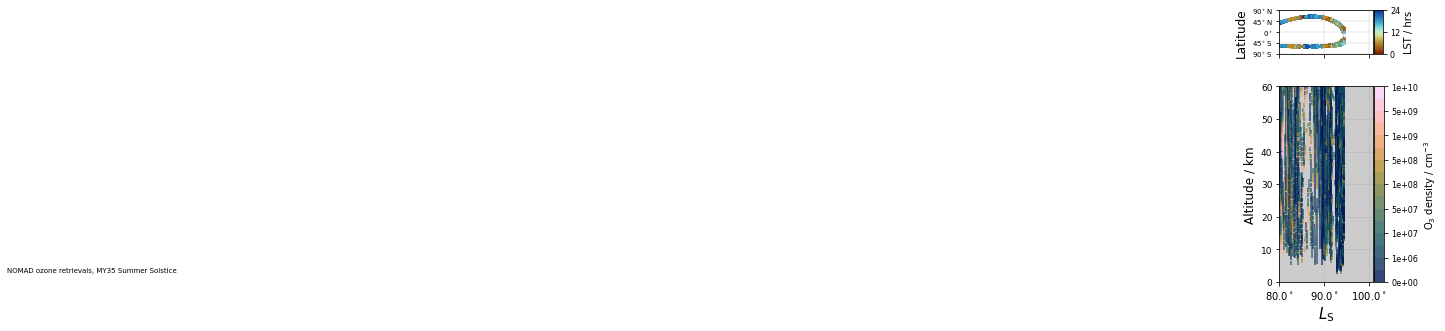

In [28]:
#MY35 Summer Solstice
#latitude

#finding the indices for Ls at the equinoxes, solstices, perihelion and aphelion between the start and end of the data. 20 Ls wide
#y and x indices are the same

#x_indices_MY35_SS_80to100 = np.where((uviso3_ls >= 440) & (uviso3_ls <= 460))


ls_min=440.
ls_max=461.

x_indices_MY35_SS_80to100 = np.where((uviso3_ls >= ls_min) & (uviso3_ls <= ls_max))
xmin_shape = np.nanmin(x_indices_MY35_SS_80to100)
xmax_shape = np.nanmax(x_indices_MY35_SS_80to100)

uviso3_ls_MY35_SS = uviso3_ls[xmin_shape:xmax_shape+1]
uviso3_lat_MY35_SS = uviso3_lat[xmin_shape:xmax_shape+1]
uviso3_alt_MY35_SS = uviso3_alt[xmin_shape:xmax_shape+1]
uviso3_o3_MY35_SS = uviso3_o3[xmin_shape:xmax_shape+1]
uviso3_o3err_MY35_SS = uviso3_o3err[xmin_shape:xmax_shape+1]
uviso3_lon_MY35_SS = uviso3_lon[xmin_shape:xmax_shape+1]

uvis_solarlong = uviso3_ls_MY35_SS
uvis_latitude = uviso3_lat_MY35_SS
uvis_altitude = uviso3_alt_MY35_SS

fig = plt.figure()
plt.subplot(4,1,1)
CS3 = plt.scatter(uvis_solarlong,uvis_latitude,c=uviso3_lt[:len(uvis_solarlong)],s=5,cmap=cmc.roma,vmin=0,vmax=24) #changed cmap from scm6 to cmc
cbar3 = plt.colorbar(CS3,ticks=[0,12,24],aspect=5,pad=0.01)
cbar3.set_label('LST / hrs',fontsize=10)
for t in cbar3.ax.get_yticklabels():
    t.set_fontsize(8)
plt.ylabel('Latitude',fontsize=12)
plt.yticks(np.arange(-90.,135.,45.),('90$^\circ$S','45$^\circ$S','0$^\circ$','45$^\circ$N','90$^\circ$N'),fontsize=7)
plt.xticks(np.arange(ls_min,ls_max,10.),('','',''),fontsize=9)
#xlabelling_MY34_AH = list(map(lambda x: '',np.arange(ls_min,ls_max,1.)))
plt.grid(lw=0.3)
plt.axis([ls_min,ls_max,-90.,90.])

plt.subplot(4,1,(2,4))
plt.axvspan(193.,250., color='tab:brown', alpha=0.3, lw=0,zorder=1)
plt.axvspan(320., 345., color='tab:brown', alpha=0.3, lw=0,zorder=1)
plt.axvspan(150.,690., color='k', alpha=0.2, lw=0,zorder=1)

#altitude
CS4 = plt.scatter(uvis_solarlong,uvis_altitude,c=uviso3_o3[:len(uvis_solarlong)],s=20,marker='|',cmap=cmc.batlow,norm=norm_o3,alpha=0.8,zorder=2)#cahnge scm6 to cmc
cbar4 = plt.colorbar(CS4,orientation='vertical', format='%.0e',pad=0.01)
cbar4.set_label(r'O$_3$ density / cm$^{-3}$',fontsize=10)
plt.xlabel('$L_\mathrm{S}$',fontsize=15)
plt.ylabel('Altitude / km',fontsize=12)
plt.text(155.,3.,'NOMAD ozone retrievals, MY35 Summer Solstice',fontsize = 7,backgroundcolor='w')
plt.grid(ls='--',lw=0.6)

for t in cbar4.ax.get_yticklabels():
    t.set_fontsize(8)
plt.yticks(np.arange(0,70,10),fontsize=9)
#plt.xticks(np.arange(160.,200.,1.),('160$^\circ$','161$^\circ$','162$^\circ$','163$^\circ$','164$^\circ$','165$^\circ$','166$^\circ$','167$^\circ$','168$^\circ$','169$^\circ$','170$^\circ$','171$^\circ$','172$^\circ$','173$^\circ$''174$^\circ$','175$^\circ$','176$^\circ$','177$^\circ$','178$^\circ$','179$^\circ$','180$^\circ$','181$^\circ$','182$^\circ$','183$^\circ$','184$^\circ$','185$^\circ$','186$^\circ$','187$^\circ$','188$^\circ$','189$^\circ$','190$^\circ$','191$^\circ$','192$^\circ$','193$^\circ$','194$^\circ$','195$^\circ$','196$^\circ$','197$^\circ$','198$^\circ$','199$^\circ$','200$^\circ$',),fontsize=5)

#xlabelling_MY34_WS = list(map(lambda x: f'{x}$^\circ$',np.arange(ls_min,ls_max,2.)))

xlabelling_MY35_SS = list(map(lambda x: f'{x}$^\circ$',list(map(lambda x: x%360,np.arange(ls_min,ls_max,10.))))) #for crossover

plt.xticks(np.arange(ls_min,ls_max,10),xlabelling_MY35_SS)

plt.axis([ls_min,ls_max,0.,60.])
plt.subplots_adjust(hspace=0.75)

fig.set_size_inches(2,5)
fig.savefig('uvis_o3_alt_ls_SSMY35.png',dpi=400,bbox_inches='tight',pad_inches = 0.2)
#plt.close()

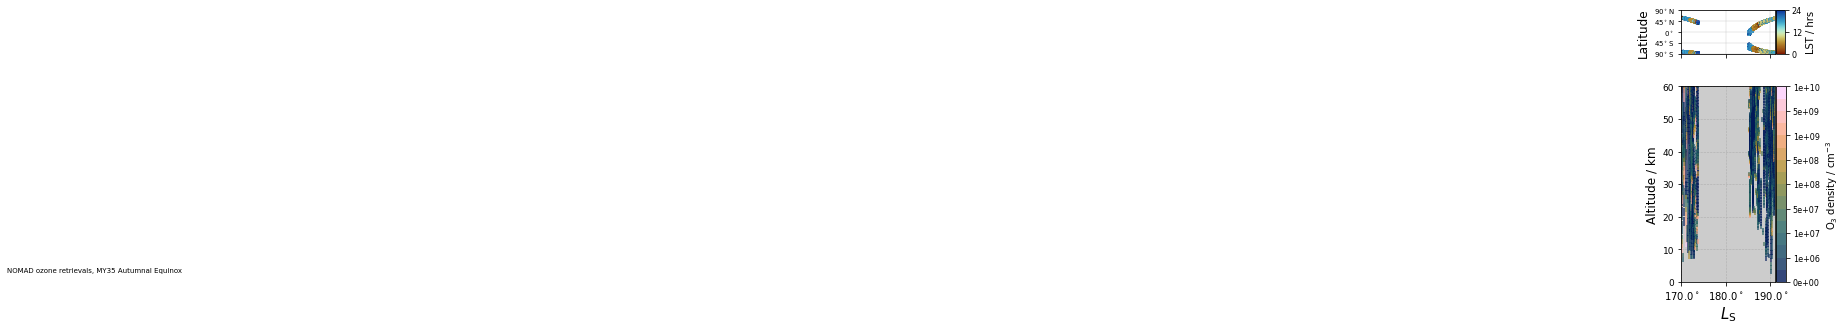

In [30]:
#MY35 Autumnal Equinox
#latitude

#finding the indices for Ls at the equinoxes, solstices, perihelion and aphelion between the start and end of the data. 20 Ls wide
#y and x indices are the same

ls_min=530.
ls_max=551.

x_indices_MY35_AE_170to190 = np.where((uviso3_ls >= ls_min) & (uviso3_ls <= ls_max))
xmin_shape = np.nanmin(x_indices_MY35_AE_170to190)
xmax_shape = np.nanmax(x_indices_MY35_AE_170to190)

uviso3_ls_MY35_AE = uviso3_ls[xmin_shape:xmax_shape+1]
uviso3_lat_MY35_AE = uviso3_lat[xmin_shape:xmax_shape+1]
uviso3_alt_MY35_AE = uviso3_alt[xmin_shape:xmax_shape+1]
uviso3_o3_MY35_AE = uviso3_o3[xmin_shape:xmax_shape+1]
uviso3_o3err_MY35_AE = uviso3_o3err[xmin_shape:xmax_shape+1]
uviso3_lon_MY35_AE = uviso3_lon[xmin_shape:xmax_shape+1]

uvis_solarlong = uviso3_ls_MY35_AE
uvis_latitude = uviso3_lat_MY35_AE
uvis_altitude = uviso3_alt_MY35_AE

fig = plt.figure()
plt.subplot(4,1,1)
CS3 = plt.scatter(uvis_solarlong,uvis_latitude,c=uviso3_lt[:len(uvis_solarlong)],s=5,cmap=cmc.roma,vmin=0,vmax=24) #changed cmap from scm6 to cmc
cbar3 = plt.colorbar(CS3,ticks=[0,12,24],aspect=5,pad=0.01)
cbar3.set_label('LST / hrs',fontsize=10)
for t in cbar3.ax.get_yticklabels():
    t.set_fontsize(8)
plt.ylabel('Latitude',fontsize=12)
plt.yticks(np.arange(-90.,135.,45.),('90$^\circ$S','45$^\circ$S','0$^\circ$','45$^\circ$N','90$^\circ$N'),fontsize=7)
plt.xticks(np.arange(ls_min,ls_max,10.),('','',''),fontsize=9)
#xlabelling_MY34_AH = list(map(lambda x: '',np.arange(ls_min,ls_max,1.)))
plt.grid(lw=0.3)
plt.axis([ls_min,ls_max,-90.,90.])

plt.subplot(4,1,(2,4))
plt.axvspan(193.,250., color='tab:brown', alpha=0.3, lw=0,zorder=1)
plt.axvspan(320., 345., color='tab:brown', alpha=0.3, lw=0,zorder=1)
plt.axvspan(150.,690., color='k', alpha=0.2, lw=0,zorder=1)

#altitude
CS4 = plt.scatter(uvis_solarlong,uvis_altitude,c=uviso3_o3[:len(uvis_solarlong)],s=20,marker='|',cmap=cmc.batlow,norm=norm_o3,alpha=0.8,zorder=2)#cahnge scm6 to cmc
cbar4 = plt.colorbar(CS4,orientation='vertical', format='%.0e',pad=0.01)
cbar4.set_label(r'O$_3$ density / cm$^{-3}$',fontsize=10)
plt.xlabel('$L_\mathrm{S}$',fontsize=15)
plt.ylabel('Altitude / km',fontsize=12)
plt.text(155.,3.,'NOMAD ozone retrievals, MY35 Autumnal Equinox',fontsize = 7,backgroundcolor='w')
plt.grid(ls='--',lw=0.6)

for t in cbar4.ax.get_yticklabels():
    t.set_fontsize(8)
plt.yticks(np.arange(0,70,10),fontsize=9)
#plt.xticks(np.arange(160.,200.,1.),('160$^\circ$','161$^\circ$','162$^\circ$','163$^\circ$','164$^\circ$','165$^\circ$','166$^\circ$','167$^\circ$','168$^\circ$','169$^\circ$','170$^\circ$','171$^\circ$','172$^\circ$','173$^\circ$''174$^\circ$','175$^\circ$','176$^\circ$','177$^\circ$','178$^\circ$','179$^\circ$','180$^\circ$','181$^\circ$','182$^\circ$','183$^\circ$','184$^\circ$','185$^\circ$','186$^\circ$','187$^\circ$','188$^\circ$','189$^\circ$','190$^\circ$','191$^\circ$','192$^\circ$','193$^\circ$','194$^\circ$','195$^\circ$','196$^\circ$','197$^\circ$','198$^\circ$','199$^\circ$','200$^\circ$',),fontsize=5)

#xlabelling_MY34_WS = list(map(lambda x: f'{x}$^\circ$',np.arange(ls_min,ls_max,2.)))

xlabelling_MY35_AE = list(map(lambda x: f'{x}$^\circ$',list(map(lambda x: x%360,np.arange(ls_min,ls_max,10.))))) #for crossover

plt.xticks(np.arange(ls_min,ls_max,10),xlabelling_MY35_AE)

plt.axis([ls_min,ls_max,0.,60.])
plt.subplots_adjust(hspace=0.75)

fig.set_size_inches(2,5)
fig.savefig('uvis_o3_alt_ls_AEMY35.png',dpi=400,bbox_inches='tight',pad_inches = 0.2)
#plt.close()

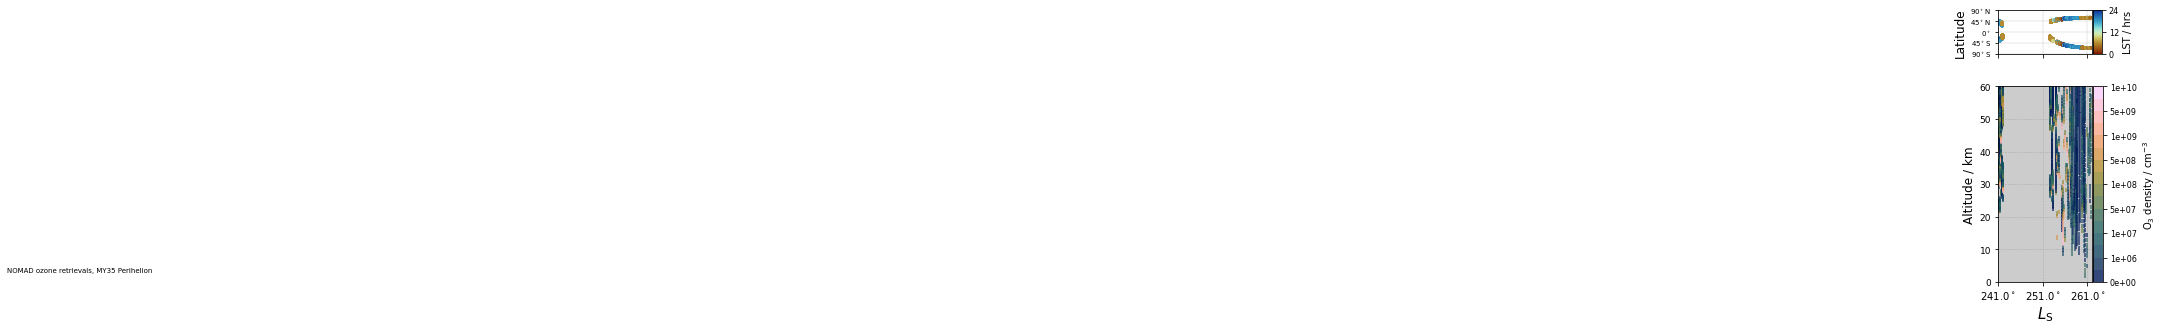

In [32]:
#MY35 Perihelion
#latitude

#finding the indices for Ls at the equinoxes, solstices, perihelion and aphelion between the start and end of the data. 20 Ls wide
#y and x indices are the same

#x_indices_MY35_PH_241to261 = np.where((uviso3_ls >= 601) & (uviso3_ls <= 621))

ls_min=601.
ls_max=622.

x_indices_MY35_PH_241to261 = np.where((uviso3_ls >= ls_min) & (uviso3_ls <= ls_max))
xmin_shape = np.nanmin(x_indices_MY35_PH_241to261)
xmax_shape = np.nanmax(x_indices_MY35_PH_241to261)

uviso3_ls_MY35_PH = uviso3_ls[xmin_shape:xmax_shape+1]
uviso3_lat_MY35_PH = uviso3_lat[xmin_shape:xmax_shape+1]
uviso3_alt_MY35_PH = uviso3_alt[xmin_shape:xmax_shape+1]
uviso3_o3_MY35_PH = uviso3_o3[xmin_shape:xmax_shape+1]
uviso3_o3err_MY35_PH = uviso3_o3err[xmin_shape:xmax_shape+1]
uviso3_lon_MY35_PH = uviso3_lon[xmin_shape:xmax_shape+1]

uvis_solarlong = uviso3_ls_MY35_PH
uvis_latitude = uviso3_lat_MY35_PH
uvis_altitude = uviso3_alt_MY35_PH

fig = plt.figure()
plt.subplot(4,1,1)
CS3 = plt.scatter(uvis_solarlong,uvis_latitude,c=uviso3_lt[:len(uvis_solarlong)],s=5,cmap=cmc.roma,vmin=0,vmax=24) #changed cmap from scm6 to cmc
cbar3 = plt.colorbar(CS3,ticks=[0,12,24],aspect=5,pad=0.01)
cbar3.set_label('LST / hrs',fontsize=10)
for t in cbar3.ax.get_yticklabels():
    t.set_fontsize(8)
plt.ylabel('Latitude',fontsize=12)
plt.yticks(np.arange(-90.,135.,45.),('90$^\circ$S','45$^\circ$S','0$^\circ$','45$^\circ$N','90$^\circ$N'),fontsize=7)
plt.xticks(np.arange(ls_min,ls_max,10.),('','',''),fontsize=9)
#xlabelling_MY34_AH = list(map(lambda x: '',np.arange(ls_min,ls_max,1.)))
plt.grid(lw=0.3)
plt.axis([ls_min,ls_max,-90.,90.])

plt.subplot(4,1,(2,4))
plt.axvspan(193.,250., color='tab:brown', alpha=0.3, lw=0,zorder=1)
plt.axvspan(320., 345., color='tab:brown', alpha=0.3, lw=0,zorder=1)
plt.axvspan(150.,690., color='k', alpha=0.2, lw=0,zorder=1)

#altitude
CS4 = plt.scatter(uvis_solarlong,uvis_altitude,c=uviso3_o3[:len(uvis_solarlong)],s=20,marker='|',cmap=cmc.batlow,norm=norm_o3,alpha=0.8,zorder=2)#cahnge scm6 to cmc
cbar4 = plt.colorbar(CS4,orientation='vertical', format='%.0e',pad=0.01)
cbar4.set_label(r'O$_3$ density / cm$^{-3}$',fontsize=10)
plt.xlabel('$L_\mathrm{S}$',fontsize=15)
plt.ylabel('Altitude / km',fontsize=12)
plt.text(155.,3.,'NOMAD ozone retrievals, MY35 Perihelion',fontsize = 7,backgroundcolor='w')
plt.grid(ls='--',lw=0.6)

for t in cbar4.ax.get_yticklabels():
    t.set_fontsize(8)
plt.yticks(np.arange(0,70,10),fontsize=9)
#plt.xticks(np.arange(160.,200.,1.),('160$^\circ$','161$^\circ$','162$^\circ$','163$^\circ$','164$^\circ$','165$^\circ$','166$^\circ$','167$^\circ$','168$^\circ$','169$^\circ$','170$^\circ$','171$^\circ$','172$^\circ$','173$^\circ$''174$^\circ$','175$^\circ$','176$^\circ$','177$^\circ$','178$^\circ$','179$^\circ$','180$^\circ$','181$^\circ$','182$^\circ$','183$^\circ$','184$^\circ$','185$^\circ$','186$^\circ$','187$^\circ$','188$^\circ$','189$^\circ$','190$^\circ$','191$^\circ$','192$^\circ$','193$^\circ$','194$^\circ$','195$^\circ$','196$^\circ$','197$^\circ$','198$^\circ$','199$^\circ$','200$^\circ$',),fontsize=5)

#xlabelling_MY34_WS = list(map(lambda x: f'{x}$^\circ$',np.arange(ls_min,ls_max,2.)))

xlabelling_MY35_PH = list(map(lambda x: f'{x}$^\circ$',list(map(lambda x: x%360,np.arange(ls_min,ls_max,10.))))) #for crossover

plt.xticks(np.arange(ls_min,ls_max,10),xlabelling_MY35_PH)

plt.axis([ls_min,ls_max,0.,60.])
plt.subplots_adjust(hspace=0.75)

fig.set_size_inches(2,5)
fig.savefig('uvis_o3_alt_ls_PHMY35.png',dpi=400,bbox_inches='tight',pad_inches = 0.2)
#plt.close()

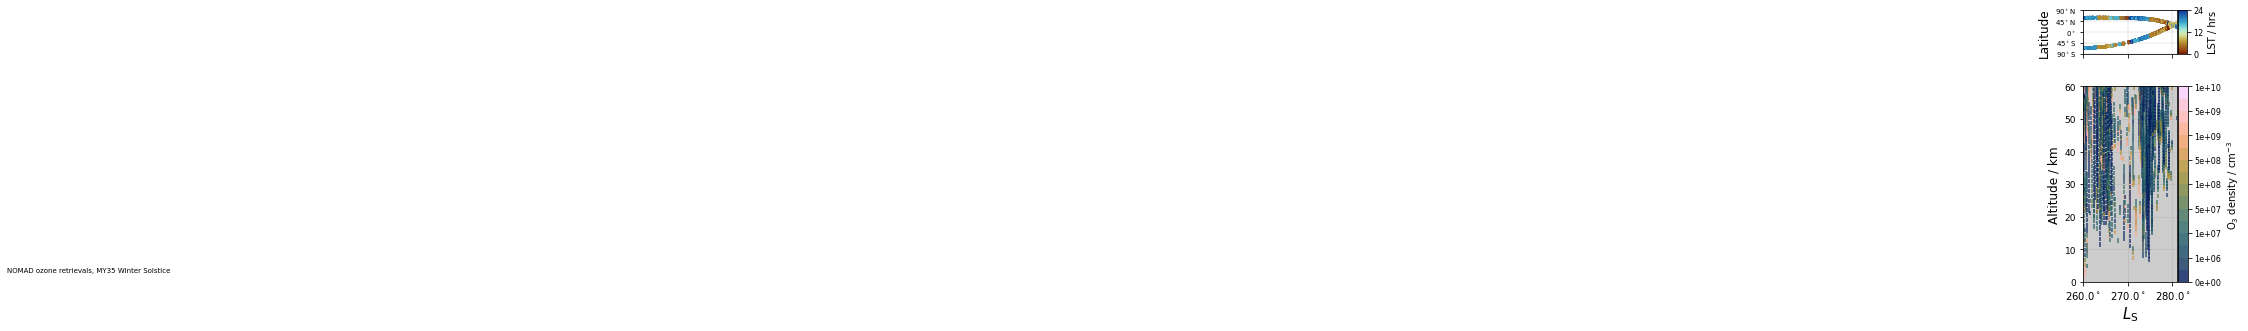

In [3]:
#MY35 Perihelion
#latitude

#finding the indices for Ls at the equinoxes, solstices, perihelion and aphelion between the start and end of the data. 20 Ls wide
#y and x indices are the same

#x_indices_MY35_WS_260to280 = np.where((uviso3_ls >= 620) & (uviso3_ls <= 640))

ls_min=620.
ls_max=641.

x_indices_MY35_WS_260to280 = np.where((uviso3_ls >= ls_min) & (uviso3_ls <= ls_max))
xmin_shape = np.nanmin(x_indices_MY35_WS_260to280)
xmax_shape = np.nanmax(x_indices_MY35_WS_260to280)

uviso3_ls_MY35_WS = uviso3_ls[xmin_shape:xmax_shape+1]
uviso3_lat_MY35_WS = uviso3_lat[xmin_shape:xmax_shape+1]
uviso3_alt_MY35_WS = uviso3_alt[xmin_shape:xmax_shape+1]
uviso3_o3_MY35_WS = uviso3_o3[xmin_shape:xmax_shape+1]
uviso3_o3err_MY35_WS = uviso3_o3err[xmin_shape:xmax_shape+1]
uviso3_lon_MY35_WS = uviso3_lon[xmin_shape:xmax_shape+1]

uvis_solarlong = uviso3_ls_MY35_WS
uvis_latitude = uviso3_lat_MY35_WS
uvis_altitude = uviso3_alt_MY35_WS

fig = plt.figure()
plt.subplot(4,1,1)
CS3 = plt.scatter(uvis_solarlong,uvis_latitude,c=uviso3_lt[:len(uvis_solarlong)],s=5,cmap=cmc.roma,vmin=0,vmax=24) #changed cmap from scm6 to cmc
cbar3 = plt.colorbar(CS3,ticks=[0,12,24],aspect=5,pad=0.01)
cbar3.set_label('LST / hrs',fontsize=10)
for t in cbar3.ax.get_yticklabels():
    t.set_fontsize(8)
plt.ylabel('Latitude',fontsize=12)
plt.yticks(np.arange(-90.,135.,45.),('90$^\circ$S','45$^\circ$S','0$^\circ$','45$^\circ$N','90$^\circ$N'),fontsize=7)
plt.xticks(np.arange(ls_min,ls_max,10.),('','',''),fontsize=9)
#xlabelling_MY34_AH = list(map(lambda x: '',np.arange(ls_min,ls_max,1.)))
plt.grid(lw=0.3)
plt.axis([ls_min,ls_max,-90.,90.])

plt.subplot(4,1,(2,4))
plt.axvspan(193.,250., color='tab:brown', alpha=0.3, lw=0,zorder=1)
plt.axvspan(320., 345., color='tab:brown', alpha=0.3, lw=0,zorder=1)
plt.axvspan(150.,690., color='k', alpha=0.2, lw=0,zorder=1)

#altitude
CS4 = plt.scatter(uvis_solarlong,uvis_altitude,c=uviso3_o3[:len(uvis_solarlong)],s=20,marker='|',cmap=cmc.batlow,norm=norm_o3,alpha=0.8,zorder=2)#cahnge scm6 to cmc
cbar4 = plt.colorbar(CS4,orientation='vertical', format='%.0e',pad=0.01)
cbar4.set_label(r'O$_3$ density / cm$^{-3}$',fontsize=10)
plt.xlabel('$L_\mathrm{S}$',fontsize=15)
plt.ylabel('Altitude / km',fontsize=12)
plt.text(155.,3.,'NOMAD ozone retrievals, MY35 Winter Solstice',fontsize = 7,backgroundcolor='w')
plt.grid(ls='--',lw=0.6)

for t in cbar4.ax.get_yticklabels():
    t.set_fontsize(8)
plt.yticks(np.arange(0,70,10),fontsize=9)
#plt.xticks(np.arange(160.,200.,1.),('160$^\circ$','161$^\circ$','162$^\circ$','163$^\circ$','164$^\circ$','165$^\circ$','166$^\circ$','167$^\circ$','168$^\circ$','169$^\circ$','170$^\circ$','171$^\circ$','172$^\circ$','173$^\circ$''174$^\circ$','175$^\circ$','176$^\circ$','177$^\circ$','178$^\circ$','179$^\circ$','180$^\circ$','181$^\circ$','182$^\circ$','183$^\circ$','184$^\circ$','185$^\circ$','186$^\circ$','187$^\circ$','188$^\circ$','189$^\circ$','190$^\circ$','191$^\circ$','192$^\circ$','193$^\circ$','194$^\circ$','195$^\circ$','196$^\circ$','197$^\circ$','198$^\circ$','199$^\circ$','200$^\circ$',),fontsize=5)

#xlabelling_MY34_WS = list(map(lambda x: f'{x}$^\circ$',np.arange(ls_min,ls_max,2.)))

xlabelling_MY35_WS = list(map(lambda x: f'{x}$^\circ$',list(map(lambda x: x%360,np.arange(ls_min,ls_max,10.))))) #for crossover

plt.xticks(np.arange(ls_min,ls_max,10),xlabelling_MY35_WS)

plt.axis([ls_min,ls_max,0.,60.])
plt.subplots_adjust(hspace=0.75)

fig.set_size_inches(2,5)
fig.savefig('uvis_o3_alt_ls_WSMY35.png',dpi=400,bbox_inches='tight',pad_inches = 0.2)
#plt.close()